# The example shown here is taken from - https://notebook.community/cgivre/oreilly-sec-ds-fundamentals/Notebooks/Unsupervised/K-Means%20Clustering%20Example

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

In [2]:
data = pd.DataFrame([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]], columns=['x','y'])
print( data )

     x     y
0  1.0   2.0
1  5.0   8.0
2  1.5   1.8
3  8.0   8.0
4  1.0   0.6
5  9.0  11.0


In [3]:
kmeans = KMeans(n_clusters=2).fit(data)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]


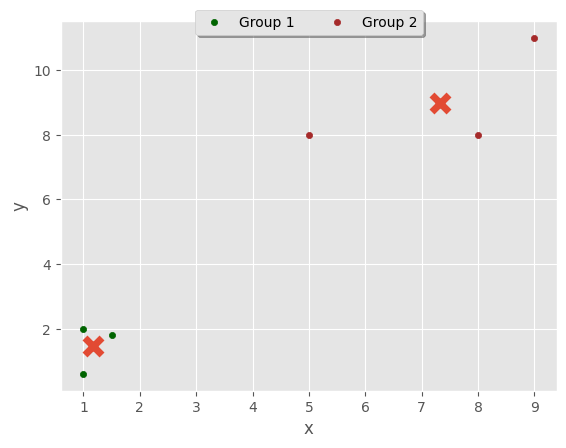

In [4]:
data['labels'] = labels

#plt.plot(data, colors[data['labels'], markersize = 10)

group1 = data[data['labels']==1].plot( kind='scatter', x='x', y='y', color='DarkGreen', label="Group 1" )
group2 = data[data['labels']==0].plot( kind='scatter', x='x', y='y', color='Brown', ax=group1, label="Group 2" )
group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()


# Another example of KMC taken from - https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb
- More info related to KMC - https://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html
- Plus - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_image.html

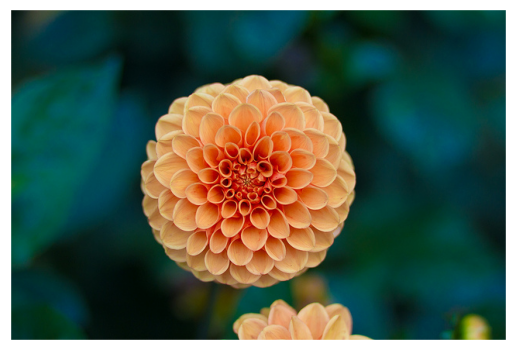

In [5]:
# Note: this requires the PIL package to be installed
from sklearn.datasets import load_sample_image
import numpy as np
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [6]:
china.shape


(427, 640, 3)

In [7]:
data = china / 255.0  # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

In [14]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

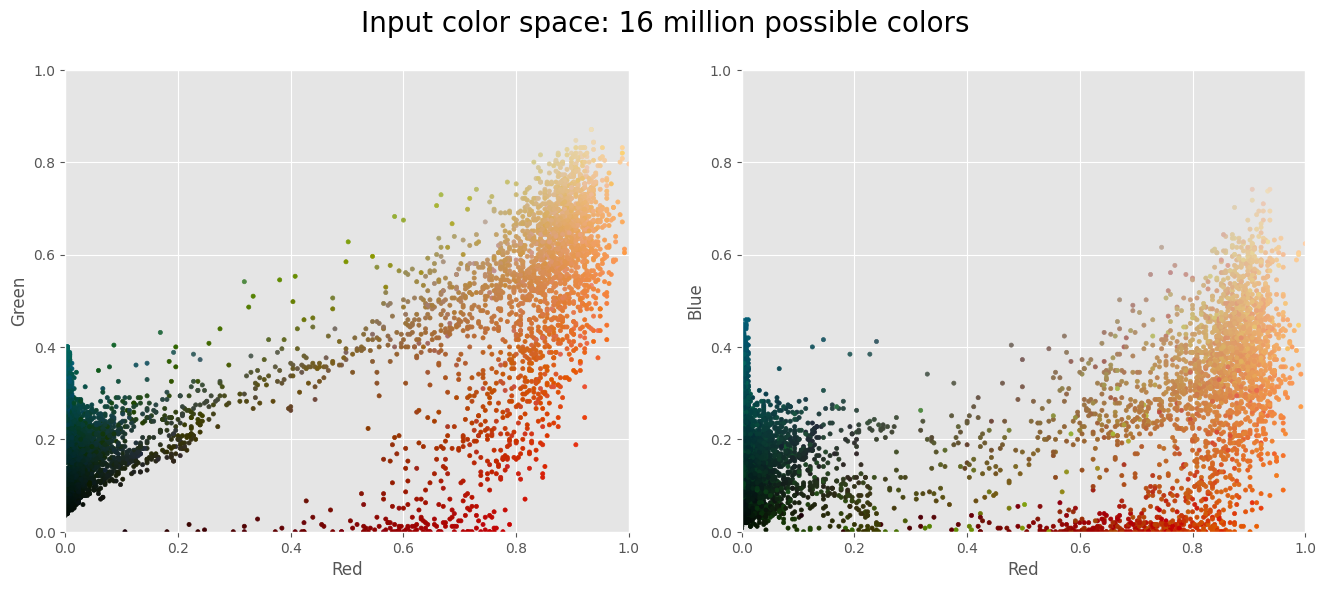

In [15]:
plot_pixels(data, title='Input color space: 16 million possible colors')


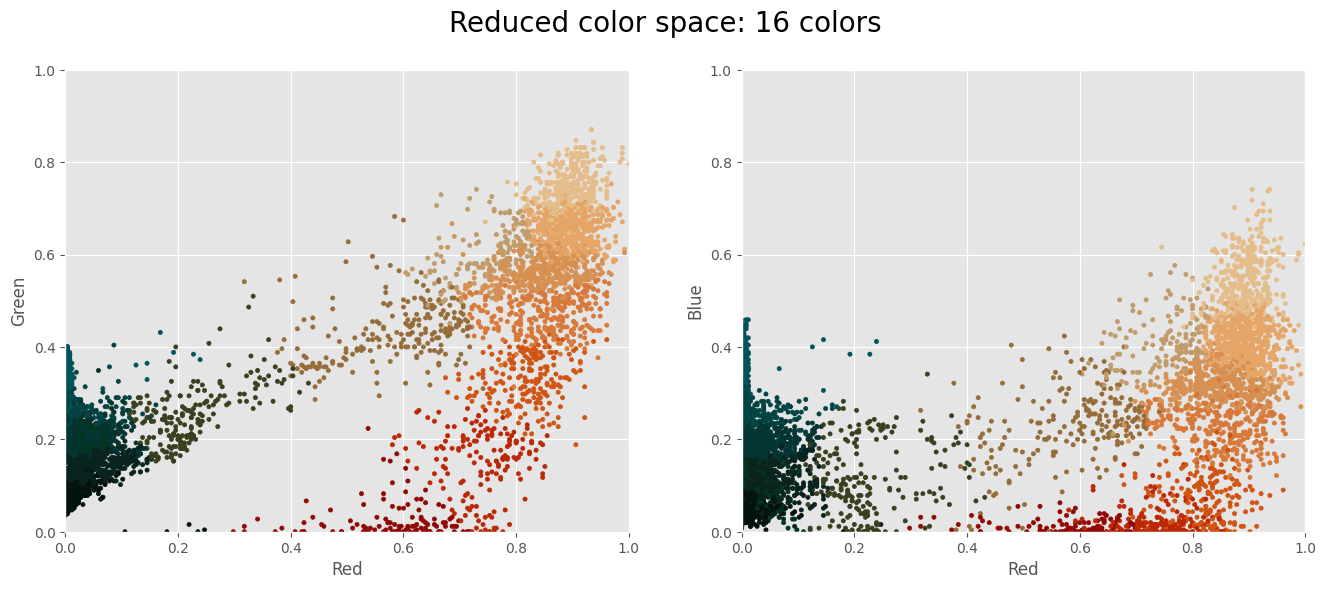

In [35]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

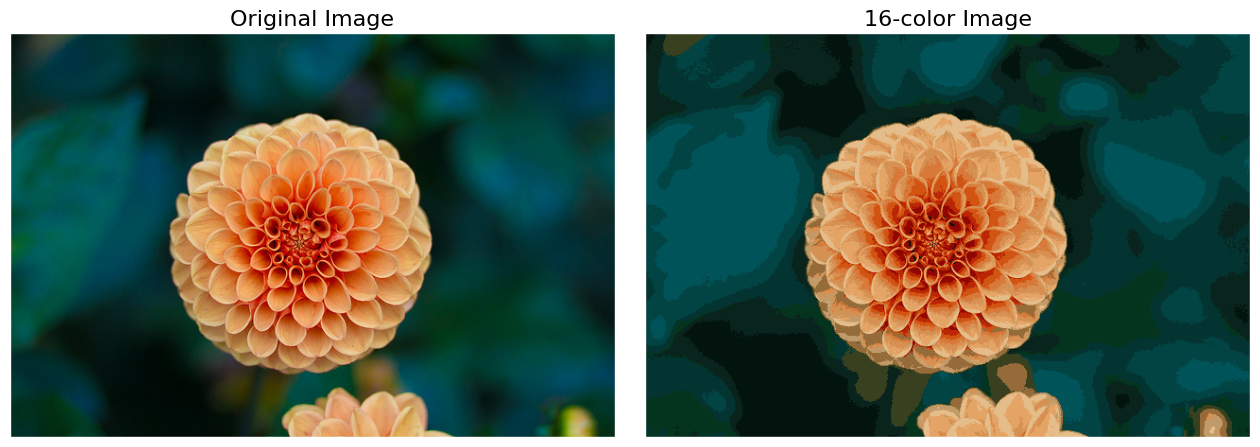

In [36]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);